In [116]:
import time
import math
import decimal
import pandas as pd
from pandas import DataFrame
from decimal import Decimal as dec
import seaborn as sns
import numpy as np
from numpy import random as np_rnd
import scipy
from scipy.stats.distributions import norm
import random as rnd
import matplotlib.pyplot as plt
from matplotlib.pyplot import plot
from IPython.display import Latex
import networkx as nx 

%matplotlib notebook

## Strassen’s algorithm for matrix multiplication

In [40]:
def strass_dot_product(m1, m2):
    if (len(m1) != len(m2)):
        raise Exception('Not equal size matrices')
    
    calls, iters = 7, 1
    split_matrix = lambda mx: (mx[:len(mx)//2,:len(mx)//2],\
    mx[len(mx)//2:,:len(mx)//2],\
    mx[:len(mx)//2,len(mx)//2:],\
    mx[len(mx)//2:,len(mx)//2:])
    
    concat_matrices = lambda ma, mb, mc, md: \
    np.matrix(np.concatenate((\
    np.concatenate((np.squeeze(np.asarray(ma)),\
                    np.squeeze(np.asarray(mb)))),\
    np.concatenate((np.squeeze(np.asarray(mc)),\
                    np.squeeze(np.asarray(md))))),axis=1))
    if (len(m1) < 4):
        return m1 @ m2, 0, iters
    
    a,b,c,d = split_matrix(m1)
    e,f,g,h = split_matrix(m2)
    
    p1, c1, i1 = strass_dot_product(a, f - h)
    p2, c2, i2 = strass_dot_product(a + b, h)
    p3, c3, i3 = strass_dot_product(c + d, e)
    p4, c4, i4 = strass_dot_product(d, g - e)
    p5, c5, i5 = strass_dot_product(a + d, e + h)
    p6, c6, i6 = strass_dot_product(b - d, g + h)
    p7, c7, i7 = strass_dot_product(a - c, e + f)
    
    i = p5 + p4 - p2 + p6
    j = p1 + p2
    k = p3 + p4
    l = p1 + p5 - p3 - p7
    
    return concat_matrices(i,j,k,l),\
            sum([c1, c2, c3, c4, c5, c6, c7, calls]),\
            sum([i1, i2, i3, i4, i5, i6, i7, iters])

#### Functions for measurement

In [62]:
get_matrix = lambda n: np.matrix(np_rnd.randint(100, size=(n,n)))

def measure_strass_dot(n):
    result = DataFrame(columns=['n', 'time', 'calls', 'iters'])
    for _ in range(5):
        time1 = time.time()
        res_i = strass_dot_product(get_matrix(n), get_matrix(n))
        result = result.append({'n':n, 'time':time.time() - time1, 'calls':res_i[1], 'iters':res_i[2]}, ignore_index=True)
    return result

def run_strass_test(n):
    result = DataFrame(columns=['n', 'time', 'calls', 'iters'])
    for i in range(1, n+1):
        result = result.append(measure_strass_dot(2 ** i).mean(), ignore_index=True)
    return result

In [81]:
strass_result = run_strass_test(9)
strass_result

,n,time,calls,iters
0,2.0,0.000192,0.0,1.0
1,4.0,0.000289,7.0,8.0
2,8.0,0.001222,56.0,57.0
3,16.0,0.006760,399.0,400.0
4,32.0,0.037869,2800.0,2801.0
5,64.0,0.254687,19607.0,19608.0
6,128.0,1.864389,137256.0,137257.0
7,256.0,12.387238,960799.0,960800.0
8,512.0,88.462936,6725600.0,6725601.0


#### And visualisation

In [104]:
def fit_cols_scale(old_df, scale):
    df = old_df.copy(deep=True)
    for col in df.columns:
        df[col] = [scale * x / df[col].max() for x in df[col]]
    
    return df

<IPython.core.display.Javascript object>


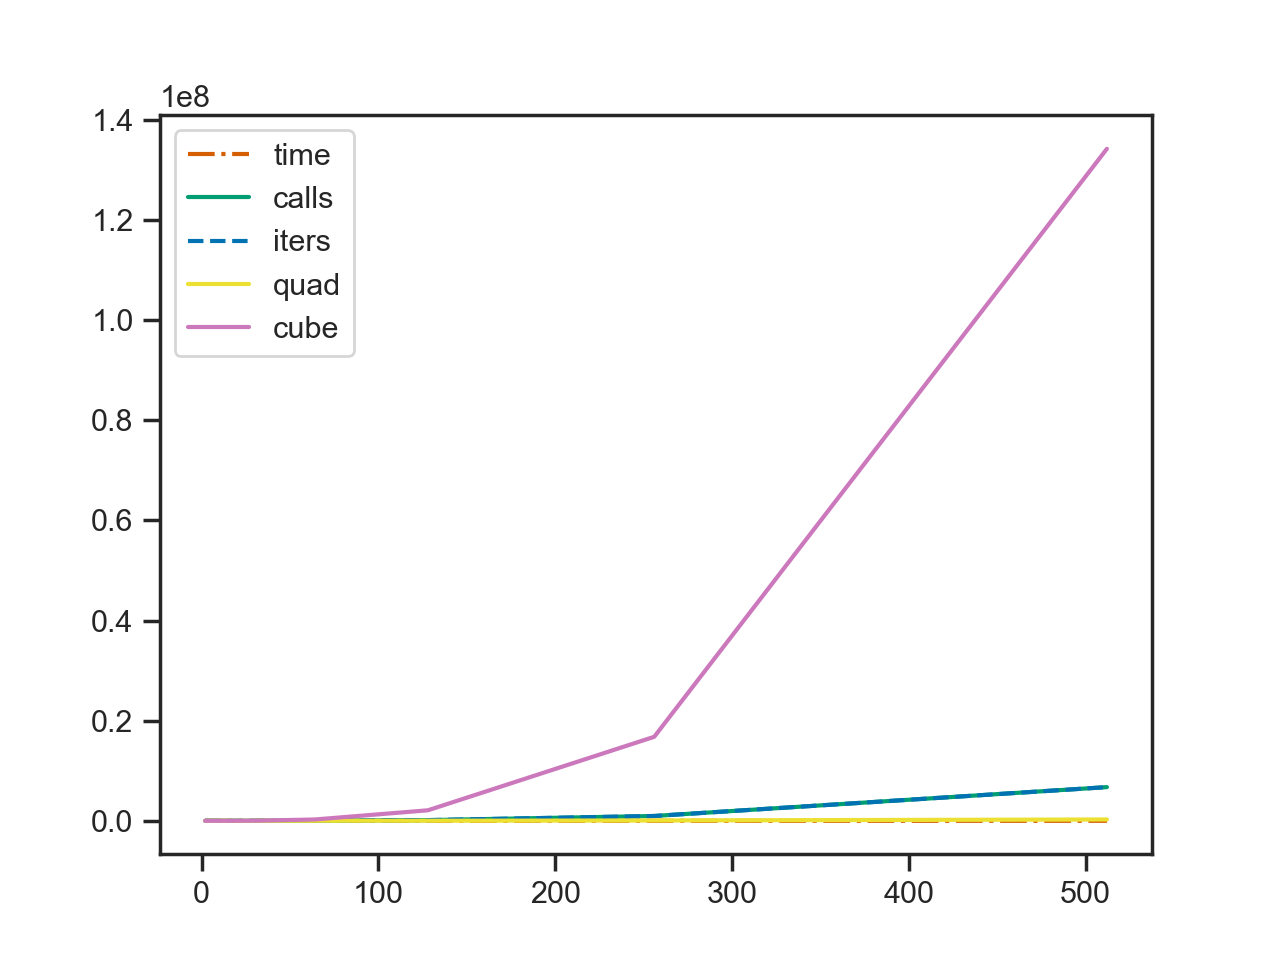

In [117]:
scaled_strass = strass_result.copy(deep=True)#fit_cols_scale(strass_result[['time', 'calls', 'iters']], strass_result['time'].max())
scaled_strass['n'] = strass_result['n']

plot(scaled_strass['n'], scaled_strass['time'], 'r-.', label='time')
plot(scaled_strass['n'], scaled_strass['calls'], 'g-', label='calls')
plot(scaled_strass['n'], scaled_strass['iters'], 'b--', label='iters')
plot(scaled_strass['n'], [xx * xx for xx in scaled_strass['n']], 'y-', label='quad')
plot(scaled_strass['n'], [xx * xx * xx for xx in scaled_strass['n']], 'm-', label='cube')
plt.legend()

<IPython.core.display.Javascript object>


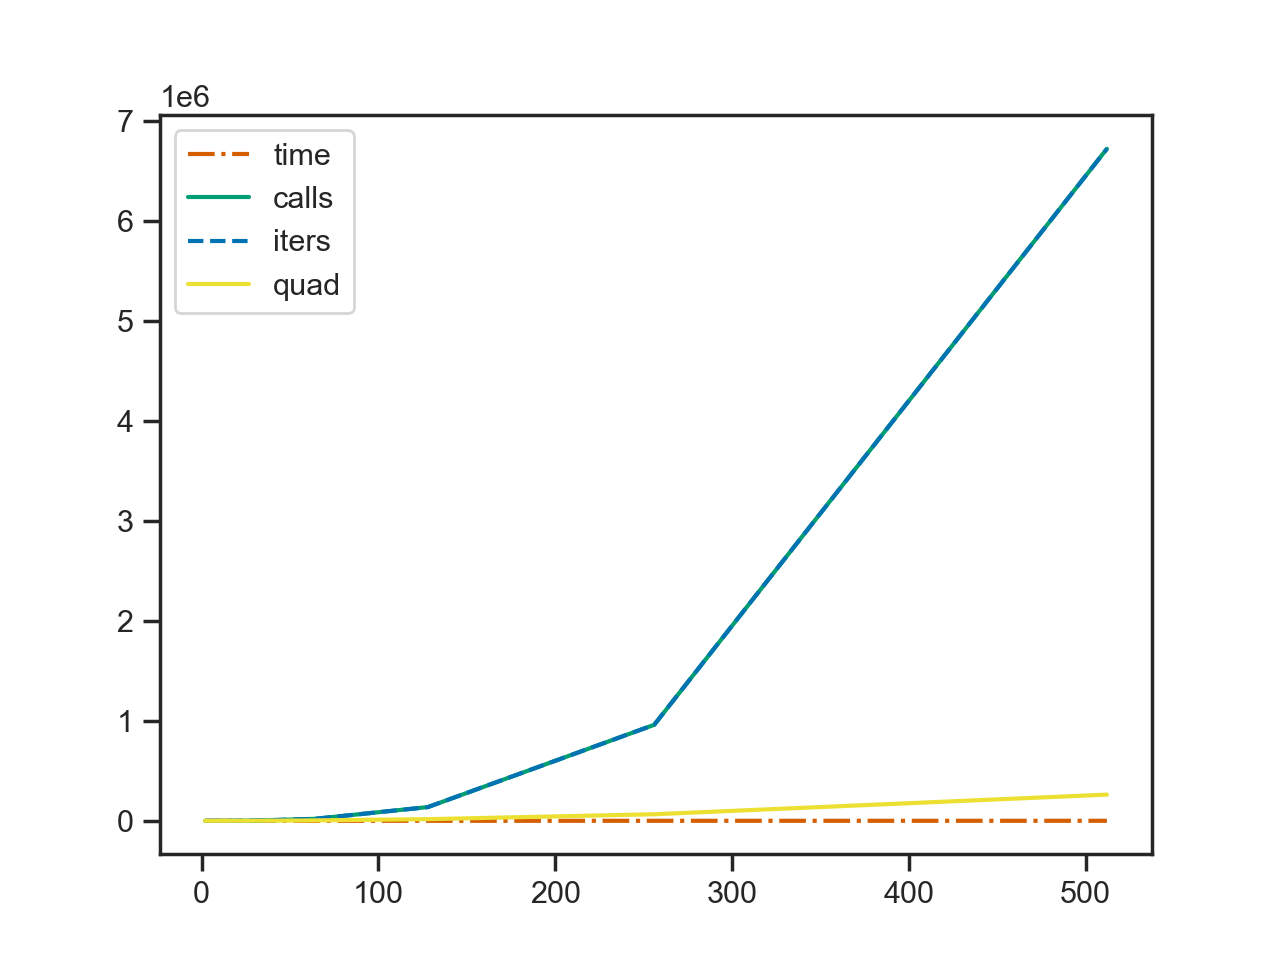

In [118]:
plot(scaled_strass['n'], scaled_strass['time'], 'r-.', label='time')
plot(scaled_strass['n'], scaled_strass['calls'], 'g-', label='calls')
plot(scaled_strass['n'], scaled_strass['iters'], 'b--', label='iters')
plot(scaled_strass['n'], [xx * xx for xx in scaled_strass['n']], 'y-', label='quad')
#plot(scaled_strass['n'], [xx * xx * xx for xx in scaled_strass['n']], 'm-', label='cube')
plt.legend()

<IPython.core.display.Javascript object>


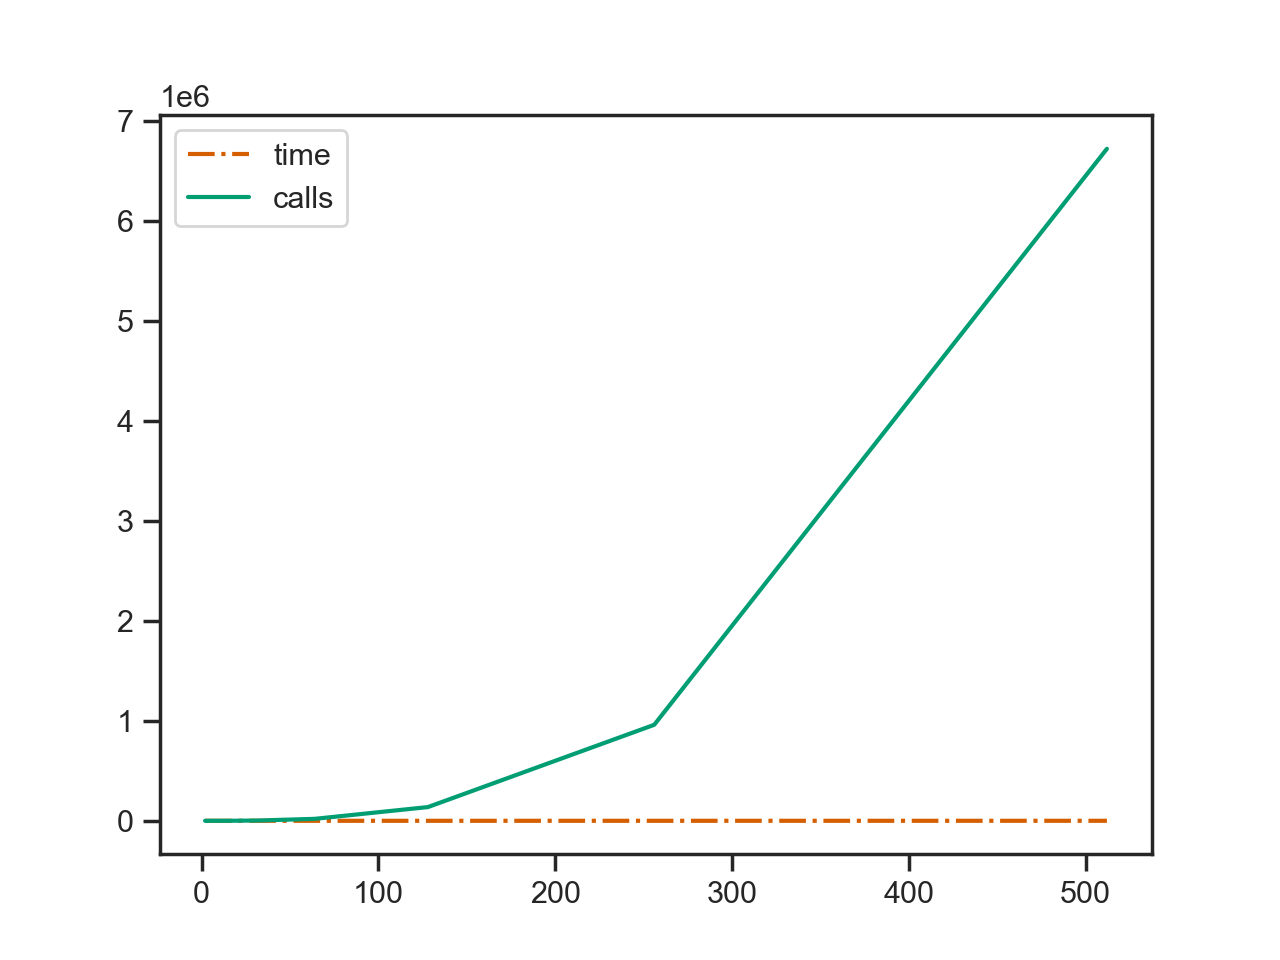

In [122]:
plot(scaled_strass['n'], scaled_strass['time'], 'r-.', label='time')
plot(scaled_strass['n'], scaled_strass['calls'], 'g-', label='calls')
#plot(scaled_strass['n'], scaled_strass['iters'], 'b--', label='iters')
#plot(scaled_strass['n'], [xx * xx for xx in scaled_strass['n']], 'y-', label='quad')
#plot(scaled_strass['n'], [xx * xx * xx for xx in scaled_strass['n']], 'm-', label='cube')
plt.legend()

<IPython.core.display.Javascript object>


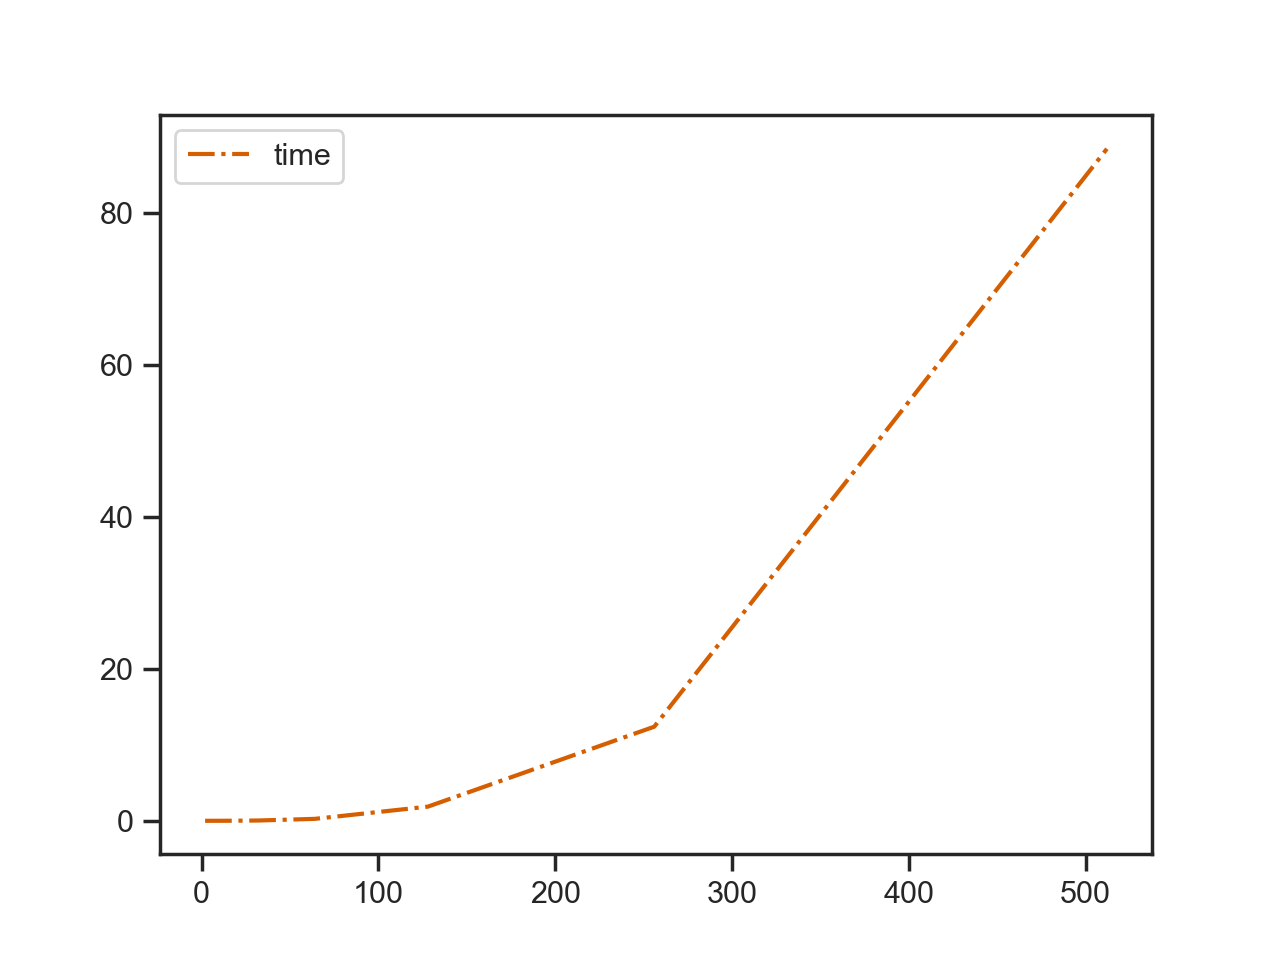

In [121]:
plot(scaled_strass['n'], scaled_strass['time'], 'r-.', label='time')
#plot(scaled_strass['n'], scaled_strass['calls'], 'g-', label='calls')
#plot(scaled_strass['n'], scaled_strass['iters'], 'b--', label='iters')
#plot(scaled_strass['n'], [xx * xx for xx in scaled_strass['n']], 'y-', label='quad')
#plot(scaled_strass['n'], [xx * xx * xx for xx in scaled_strass['n']], 'm-', label='cube')
plt.legend()

<IPython.core.display.Javascript object>


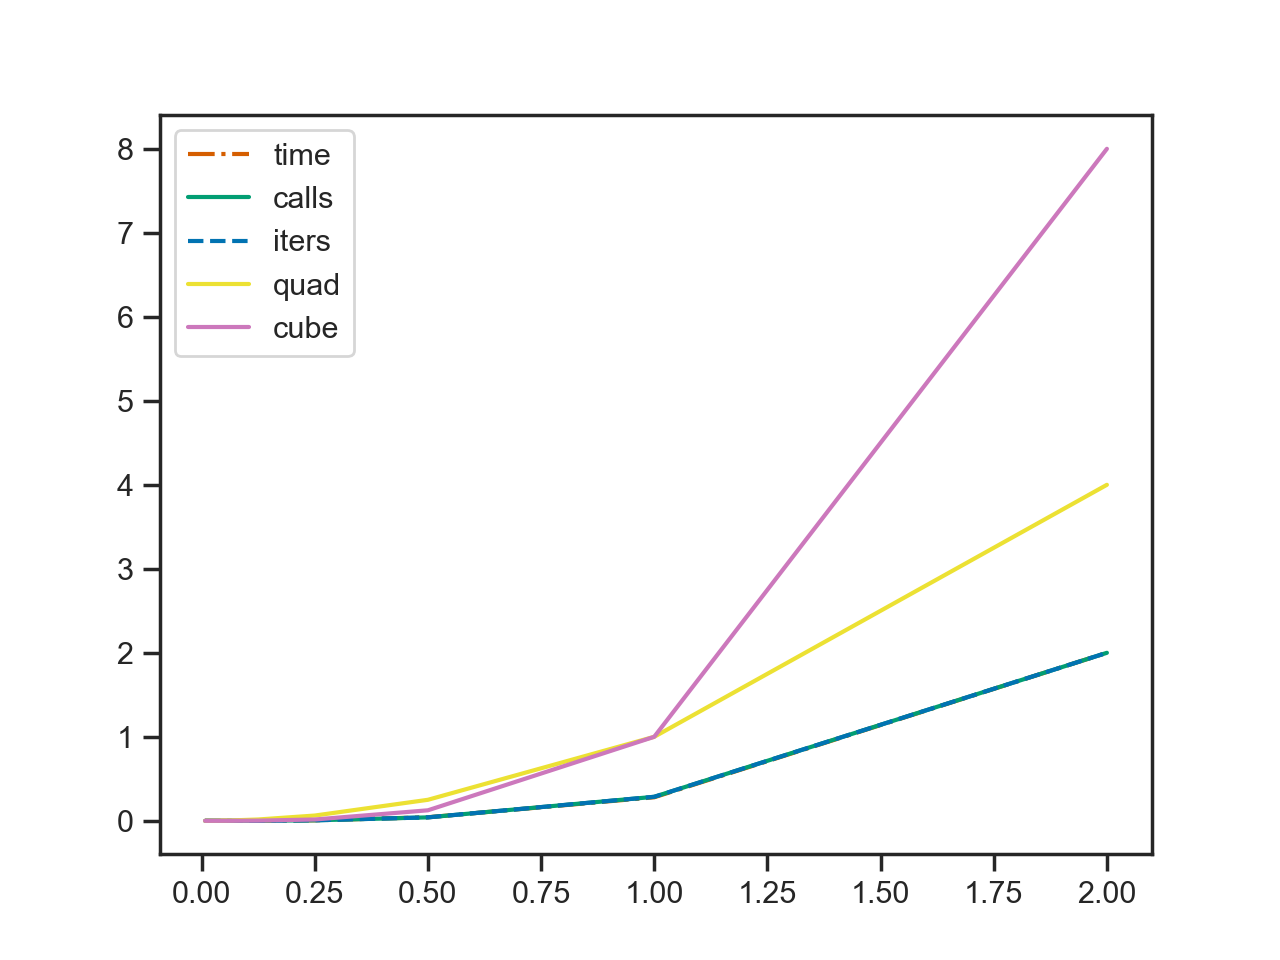

In [134]:
scaled_strass = strass_result.copy(deep=True)
scaled_strass['n'] = strass_result['n']
scaled_strass = fit_cols_scale(scaled_strass, 2)
scaled_strass['quad'] = [xx * xx for xx in scaled_strass['n']]
scaled_strass['cube'] = [xx * xx * xx for xx in scaled_strass['n']]


plot(scaled_strass['n'], scaled_strass['time'], 'r-.', label='time')
plot(scaled_strass['n'], scaled_strass['calls'], 'g-', label='calls')
plot(scaled_strass['n'], scaled_strass['iters'], 'b--', label='iters')
plot(scaled_strass['n'], scaled_strass['quad'], 'y-', label='quad')
plot(scaled_strass['n'], scaled_strass['cube'], 'm-', label='cube')
plt.legend()

## Kruskal’s algorithm for finding Minimum Spanning Trees

In [183]:
def kruskal_MST(gr):
    iters = 0
    vertices = []
    MST = []
    MST_E = []
    for edge in gr:
        if edge[0] not in vertices:
            vertices.append(edge[0])
        if edge[1] not in vertices:
            vertices.append(edge[1])
    gr.sort(key=lambda el: el[2])
    
    least = gr.pop(0)
    
    vertices.remove(least[0])
    vertices.remove(least[1])
    MST += [least[0], least[1]]
    MST_E = [least]
    
    while len(vertices) > 0:
        choise = None
        for edge in gr:
            iters += 1
            if edge[0] in vertices and edge[1] in MST:
                choise = edge
                vertices.remove(edge[0])
                MST.append(edge[0])
                break
            elif edge[1] in vertices and edge[0] in MST:
                choise = edge
                vertices.remove(edge[1])
                MST.append(edge[1])
                break
        gr.remove(choise)
        MST_E += [choise]
    return {'vertices': MST, 'edges': MST_E}, iters

In [169]:
def generate_weighted_graph(v_n, e_n):
    if e_n < v_n-1:
        raise Exception("Less vertices then edges-1. Nonconnected graph")
    e = {(vertex, vertex+1): np_rnd.random() for vertex in range(0, v_n-1)}
    while len(e) < e_n:
        choice = tuple(np_rnd.randint(v_n, size=2))
        if choice[1] != choice[0] and choice not in e and (choice[1], choice[0]) not in e:
            e[choice] = np_rnd.random()
            
    return [edge + tuple([e[edge]]) for edge in e]

#### Functions for testing

In [189]:
def test_kruskal(n):
    result = DataFrame(columns=['n', 'time', 'iters'])
    for _ in range(5):
        time1 = time.time()
        res = kruskal_MST(generate_weighted_graph(n, 5 * n))
        result = result.append({'n': n, 'time': time.time() - time1, 'iters': res[1]}, ignore_index=True)
    return result

def run_kruskal_test(n_start, n_finish):
    result = DataFrame(columns=['n', 'time', 'iters'])
    for i in range(n_start, n_finish + 1):
        result = result.append(test_kruskal(i).mean(), ignore_index=True)
    return result

In [195]:
kruskal_result = run_kruskal_test(50, 250)

In [196]:
kruskal_result

,n,time,iters
0,50.0,0.007469,526.0
1,51.0,0.006508,549.4
2,52.0,0.005839,598.4
3,53.0,0.005946,613.0
4,54.0,0.006393,616.2
...,...,...,...
196,246.0,0.170347,12964.0
197,247.0,0.175851,12598.8
198,248.0,0.183168,13405.2
199,249.0,0.177356,13104.2


<IPython.core.display.Javascript object>


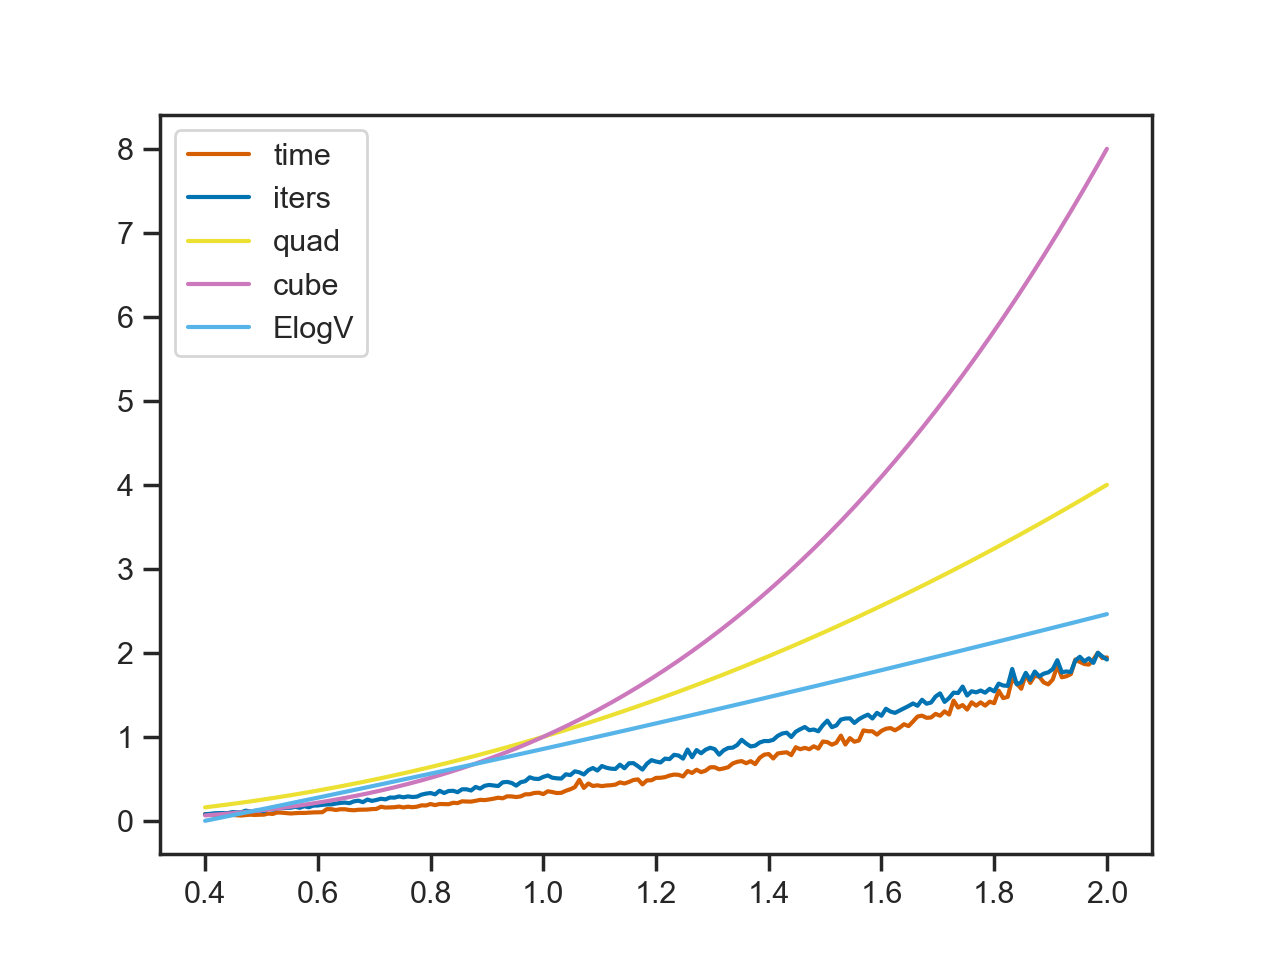

In [230]:
scaled_kruskal = kruskal_result.copy(deep=True)
scaled_kruskal['n'] = kruskal_result['n']
scaled_kruskal = fit_cols_scale(scaled_kruskal, 2)
scaled_kruskal['quad'] = [xx * xx for xx in scaled_kruskal['n']]
scaled_kruskal['ElogV'] = [xx * 5 * math.log2( xx) for xx in np.linspace(1,1.3,len(scaled_kruskal['n']))]
scaled_kruskal['cube'] = [xx * xx * xx for xx in scaled_kruskal['n']]


plot(scaled_kruskal['n'], scaled_kruskal['time'], 'r-', label='time')
plot(scaled_kruskal['n'], scaled_kruskal['iters'], 'b-', label='iters')
plot(scaled_kruskal['n'], scaled_kruskal['quad'], 'y-', label='quad')
plot(scaled_kruskal['n'], scaled_kruskal['cube'], 'm-', label='cube')
plot(scaled_kruskal['n'], scaled_kruskal['ElogV'], 'c-', label='ElogV')
plt.legend()